# IBM Data Science Capstone Project

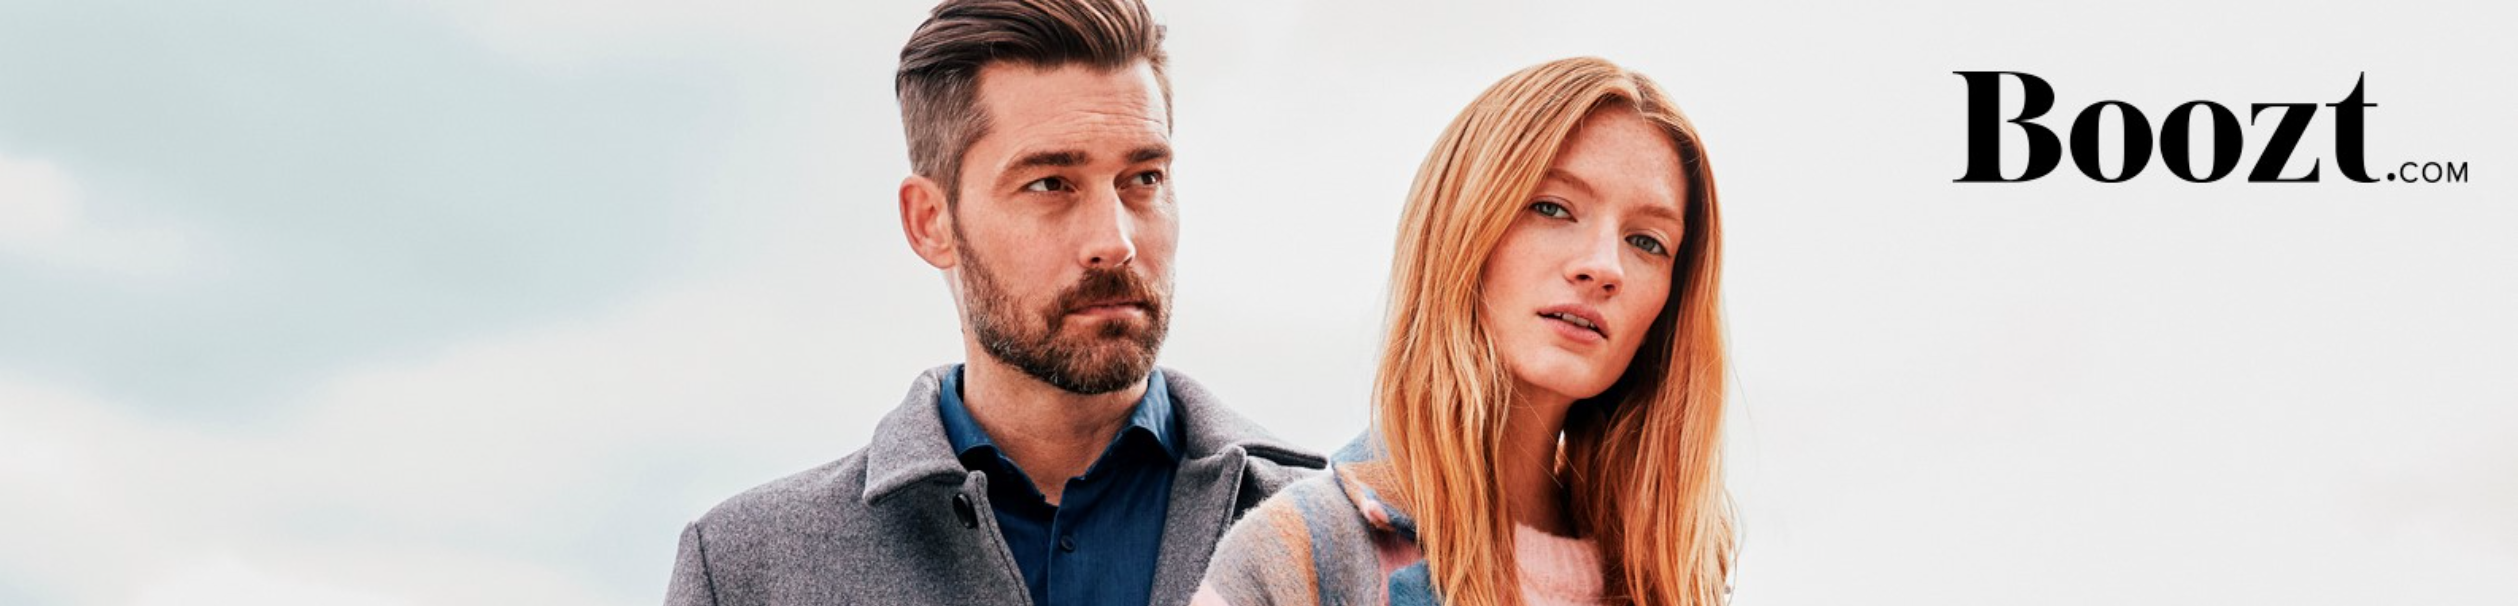

## Table of Contents

  <p><b>1.0  Introduction</b></p>
  <p><b>2.0  Importing Data Sets</b></p>
  <p><b>3.0  Exploratory Data Analysis</b></p>
  <p><b>4.0  K-means Clustering</b></p>
  <p><b>5.0  Analysing Each Cluster</b></p>

# 1.0 Introduction




<h3>1.1	Business Problem & Analysis Objective </h3>

In this project, we will hypothesize that an online shopping fashion company – Boozt, decides to expand their business to the city of Toronto. To ensure that every dollar is strategically spent, this fashion company must selectively choose the most optimal regions for advertising to grab the potential customers.
Problem Statement: This project seeks to determine the most strategic region in Toronto for a fashion company to spread of advertising.

<h3>1.2	Data Requirements</h3>

In this project, we will take into account of the supply of advertising location and demand from customers to assess the potential of each region. Furthermore, bus stop has decide as main advertising location, the number of nearby bus stop within a 3km radius to a neighborhood is used to determine the advertising density. On the other hand, the fashion demand from a customer is assumed to be driven by purchasing power of each neighborhood's population. The purchasing power is both determined by population size and average household income.

      Data Sources:
      1.	Nearby bus stop- Foursquare
      2.	Location data - Wikipedia
      3.	Demographic/ socioeconomic data (population size by neighbourhood, average after tax household income by neighbourhood) - Wellbeing Toronto

<h3>1.3	Methodology</h3>

    1.Various data sets were imported and subsequently combined into a single data frame.
    2.Foursquare API is used to determine the number of nearby bus stopwithin a 3km radius to a neighborhood, this is returned as bus stop count and appended to the combined dataframe.
    3.To determine the most strategic location, neighbourhoods will be segregated into different regions via k-means clustering.
    4.The statistical data on each region (or cluster) is then generated and explored.


# 2.0 Importing Data Sets

<h3>2.1 Toronto Neighborhood Data - Webscraping from Wikipedia, Appending Location Data </h3>

In [1]:
# Import the relevant liberies

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# Webscraping - Fetch the data from Wikipedia

df = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_postal_codes_of_Canada:_M&oldid=945633050')[0]
df = df[df.Borough!='Not assigned']
df.shape

(210, 3)

In [3]:
# Fetch the Geo Dataset and save as dataframe
df_geoData = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv")

# Rename the PostalCode for consistent column name
df_geoData.rename(columns={'Postal Code':'Postcode'}, inplace=True)

# Merge the neighborhood data with Geo dataset by key = 'PostalCode'.
# Check the dataframe to ensure all Postalcode matched with coordinates (Data checked).
df_toronto = pd.merge(df, df_geoData, on='Postcode', how='inner')
df_toronto.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,Lawrence Heights,43.718518,-79.464763
4,M6A,North York,Lawrence Manor,43.718518,-79.464763
5,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
6,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
7,M1B,Scarborough,Rouge,43.806686,-79.194353
8,M1B,Scarborough,Malvern,43.806686,-79.194353
9,M3B,North York,Don Mills North,43.745906,-79.352188


<h3> 2.2 Toronto Income & Population data - Export from Wellbeing_toronto website </h3>

<url>http://map.toronto.ca/wellbeing/#eyJ0b3Itd2lkZ2V0LWNsYXNzYnJlYWsiOsSAcGVyY2VudE9wYWNpdHnElzcwfSwiY3VzxIJtYcSTYcSXxIBuZWlnaGJvdXJob29kc8S2fcSrxIHEg8SFxIfEicSLdGFixYXEmCLEo3RpdmVUxZBJZMSXxYnEhMWPYi1pbmRpY2HEgnLFhcWIYWdzTWFwxLYiesWCbcSXMTPErHjEly04ODM3NzYzLjXGhDcyN8SsxKc6NTQxMjkzMS4yNMaDMjg1xYjFpMWmxajFqsWSxIDFmMWraW9uxJcyxKxzxaRnbGXFtMSucsSTxJ9UaW1lxZzEqMSsxZbGucajIjfFtMafxafFqcSDxZxzQcWlV8S5xLt0xZJbxIDEh8WeMTUzIsSsd8eNaHTFucSsxJPGpXNlUG%2FEjnLEpcaOZmFsx6J9XcWHxYjGvmXHosenx7PFhsSsxrPGtXRJxaXHhcWqTcWDxrE6IsatbsavxrHFhw%3D%3D</url>

In [30]:
data_income = pd.read_csv("https://raw.githubusercontent.com/smallsofaDK/Coursera_Capstone/main/wellbeing_toronto.csv")
df_income = pd.DataFrame(data_income)
df_income.shape

(140, 5)

In [5]:
df_basic_data = df_income.drop(columns=['Neighbourhood Id','Combined Indicators'])
df_basic_data.head(10)

,Neighbourhood,After-Tax Household Income,Total Population
0,West Humber-Clairville,59703.0,33312.0
1,Mount Olive-Silverstone-Jamestown,46986.0,32954.0
2,Thistletown-Beaumond Heights,57522.0,10360.0
3,Rexdale-Kipling,51194.0,10529.0
4,Elms-Old Rexdale,49425.0,9456.0
5,Kingsview Village-The Westway,50714.0,22000.0
6,Willowridge-Martingrove-Richview,57048.0,22156.0
7,Humber Heights-Westmount,54919.0,10948.0
8,Edenbridge-Humber Valley,62463.0,15535.0
9,Princess-Rosethorn,93391.0,11051.0


<h3> 2.3 Appending Data Sets </h3>

In [6]:
final_toronto_stats = pd.merge(df_toronto, df_basic_data, how='inner', on = 'Neighbourhood')
final_toronto_stats.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population
0,M4A,North York,Victoria Village,43.725882,-79.315572,43743.0,17510.0
1,M1B,Scarborough,Rouge,43.806686,-79.194353,72784.0,46496.0
2,M1B,Scarborough,Malvern,43.806686,-79.194353,53425.0,43794.0
3,M1C,Scarborough,Highland Creek,43.784535,-79.160497,87321.0,12494.0
4,M3C,North York,Flemingdon Park,43.725900,-79.340923,43511.0,21933.0
5,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,49252.0,14365.0
6,M9C,Etobicoke,Markland Wood,43.643515,-79.577201,64297.0,10554.0
7,M1E,Scarborough,Guildwood,43.763573,-79.188711,67678.0,9917.0
8,M1E,Scarborough,Morningside,43.763573,-79.188711,50069.0,17455.0
9,M1E,Scarborough,West Hill,43.763573,-79.188711,46803.0,27392.0


<h3> 2.4 Foursquare to Count Number of bus stops </h3>

In [13]:
CLIENT_ID = 'TNB1SBR32DVKFCISBM5H15KA5EI03WRTB050TD0YUVY1QQLW' # your Foursquare ID
CLIENT_SECRET = 'Q4PQ5THSHGF42SDPHLQYAWPZX4P4J2RX41CFLKRV3WXZCRNC' # your Foursquare Secret
ACCESS_TOKEN = '1HIENNYDKRYFPYXHJDHYJ2S0B5XJAFYRGMEURYA3FQRKU2MN' # your FourSquare Access Token
VERSION = '20180604' # Foursquare API version
LIMIT = 300 # A default Foursquare API limit value


In [18]:
# Define the query word and radius
search_query = 'Bus stop'
radius = 50000

# Toronto geo
latitude = 43.643515
longitude = -79.577201

# Define the response URL and get the result as json format
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head(5)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.crossStreet,location.city,location.state,location.postalCode,location.address,location.neighborhood
0,5166d76ce4b01695f970b9a1,Missisauga Bus Stop #1309,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",v-1627808470,False,43.639558,-79.584139,"[{'label': 'display', 'lat': 43.639558, 'lng':...",711,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,NaN
1,4f3a53e6e4b0ae43d16fcb31,Sabine Bus Stop,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",v-1627808470,False,43.667052,-79.559617,"[{'label': 'display', 'lat': 43.66705184632205...",2978,CA,Canada,"[Martin Grove, Canada]",Martin Grove,NaN,NaN,NaN,NaN,NaN
2,4ffdb500e4b07769ea081c58,Mississauga/Toronto bus stop,"[{'id': '4bf58dd8d48988d12b951735', 'name': 'B...",v-1627808470,False,43.631054,-79.555737,"[{'label': 'display', 'lat': 43.63105411644539...",2216,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,NaN
3,4e09bc9562e100e5817e65e9,Bus stop #2915,[],v-1627808470,False,43.645113,-79.610573,"[{'label': 'display', 'lat': 43.64511315750388...",2694,CA,Canada,"[Mississauga ON, Canada]",NaN,Mississauga,ON,NaN,NaN,NaN
4,589613768ae3633850fa2794,MiWay bus stop - bus #20 east to Islington Sub...,"[{'id': '52f2ab2ebcbc57f1066b8b4f', 'name': 'B...",v-1627808470,False,43.607505,-79.632238,"[{'label': 'display', 'lat': 43.607505, 'lng':...",5978,CA,Canada,"[Mississauga ON, Canada]",NaN,Mississauga,ON,NaN,NaN,NaN


In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,lat,lng,labeledLatLngs,distance,cc,country,formattedAddress,crossStreet,city,state,postalCode,address,neighborhood,id
0,Missisauga Bus Stop #1309,Bus Stop,43.639558,-79.584139,"[{'label': 'display', 'lat': 43.639558, 'lng':...",711,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,NaN,5166d76ce4b01695f970b9a1
1,Sabine Bus Stop,Bus Line,43.667052,-79.559617,"[{'label': 'display', 'lat': 43.66705184632205...",2978,CA,Canada,"[Martin Grove, Canada]",Martin Grove,NaN,NaN,NaN,NaN,NaN,4f3a53e6e4b0ae43d16fcb31
2,Mississauga/Toronto bus stop,Bus Line,43.631054,-79.555737,"[{'label': 'display', 'lat': 43.63105411644539...",2216,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,NaN,4ffdb500e4b07769ea081c58
3,Bus stop #2915,None,43.645113,-79.610573,"[{'label': 'display', 'lat': 43.64511315750388...",2694,CA,Canada,"[Mississauga ON, Canada]",NaN,Mississauga,ON,NaN,NaN,NaN,4e09bc9562e100e5817e65e9
4,MiWay bus stop - bus #20 east to Islington Sub...,Bus Stop,43.607505,-79.632238,"[{'label': 'display', 'lat': 43.607505, 'lng':...",5978,CA,Canada,"[Mississauga ON, Canada]",NaN,Mississauga,ON,NaN,NaN,NaN,589613768ae3633850fa2794
5,The Queensway & Burma Dr WB Bus Stop,Bus Stop,43.628098,-79.494992,"[{'label': 'display', 'lat': 43.628098, 'lng':...",6841,CA,Canada,"[Toronto ON M8Y 1K1, Canada]",NaN,Toronto,ON,M8Y 1K1,NaN,NaN,5ce93250fb8e59002c02b32d
6,Bus Stop,Bus Stop,43.809917,-79.474791,"[{'label': 'display', 'lat': 43.80991716033036...",20273,CA,Canada,"[Vaughan ON, Canada]",NaN,Vaughan,ON,NaN,NaN,NaN,4f7dff57e4b0fcf30c48bb12
7,UTM Bus Stop,Bus Station,43.547884,-79.663474,"[{'label': 'display', 'lat': 43.54788424722476...",12716,CA,Canada,[Mississauga Rd. N. (in University of Toronto ...,in University of Toronto Mississauga,Mississauga,ON,NaN,Mississauga Rd. N.,NaN,4ccf406d06b54688a1f6d394
8,Bus stop 0815,Bus Stop,43.600392,-79.593646,"[{'label': 'display', 'lat': 43.60039185152025...",4979,CA,Canada,[Canada],NaN,NaN,NaN,NaN,NaN,NaN,4ed3081e5c5c9528fc6cfde5
9,Bus Stop #2904,Bus Stop,43.671894,-79.593090,"[{'label': 'display', 'lat': 43.671894, 'lng':...",3408,CA,Canada,"[Renforth Drive (Convair Drive), Toronto ON M9...",Convair Drive,Toronto,ON,M9W 6Z9,Renforth Drive,NaN,5d93c7044fd9fd00081f9178


In [20]:
# count number of bus stops
len(dataframe_filtered[['name']].drop_duplicates())

48

<h3>2.6: Forsquare to Count Number of bus stops - All Neighbourhoods </h3>

In [34]:
# generate neighbourhood list

neighbourhood_list = list(final_toronto_stats['Neighbourhood'])
neighbourhood_list[3]

'Highland Creek'

In [39]:
# import location data from Forsquare

# other conditions
radius = 3000
search_query = 'Bus stop'

# set global variable
i=0

# make list for busstop count
count_busstop = []


for x in neighbourhood_list:
    
    i
    latitude = final_toronto_stats.iloc[i]['Latitude']
    longitude = final_toronto_stats.iloc[i]['Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    i = i + 1
    
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    total_df = json_normalize(venues)
    total_df.head()
    
    count_busstop.append(len(total_df[['name']].drop_duplicates()))
    print(len(total_df[['name']].drop_duplicates()))

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:27: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


50
35
35
38
49
49
50
48
48
48
50
49
50
50
50
49
49
50
50
50
50
50
31
37
49
50
49
49
50
50
42
42
50
50
50


In [49]:
from pandas import DataFrame as df

final_toronto_stats_2 = final_toronto_stats

count_busstop_df = df(count_busstop,columns=['Busstop Count'])
final_toronto_stats_2 = final_toronto_stats_2.join(count_busstop_df)
final_toronto_stats_2

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Busstop Count
0,M4A,North York,Victoria Village,43.725882,-79.315572,43743.0,17510.0,50
1,M1B,Scarborough,Rouge,43.806686,-79.194353,72784.0,46496.0,35
2,M1B,Scarborough,Malvern,43.806686,-79.194353,53425.0,43794.0,35
3,M1C,Scarborough,Highland Creek,43.784535,-79.160497,87321.0,12494.0,38
4,M3C,North York,Flemingdon Park,43.725900,-79.340923,43511.0,21933.0,49
5,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,49252.0,14365.0,49
6,M9C,Etobicoke,Markland Wood,43.643515,-79.577201,64297.0,10554.0,50
7,M1E,Scarborough,Guildwood,43.763573,-79.188711,67678.0,9917.0,48
8,M1E,Scarborough,Morningside,43.763573,-79.188711,50069.0,17455.0,48
9,M1E,Scarborough,West Hill,43.763573,-79.188711,46803.0,27392.0,48


# 3.0 Exploratory Data Analysis
<h3>3.1: Folium Mapping</h3>

In [24]:
# import relevant libraries
    # tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 
import json

    # Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
    
    #folium
#!pip install folium
import folium

# import matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
# visualize these items on the map
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='#3186cc',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

<h3>3.2: Visualising (After Tax) Household Income</h3>

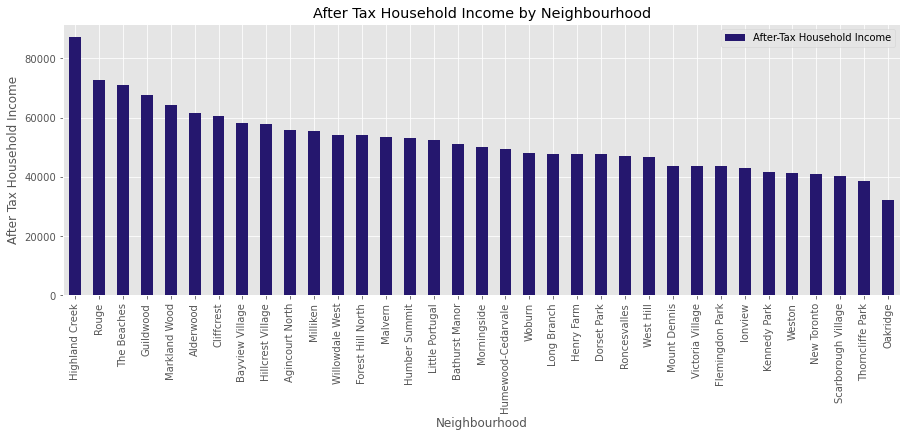

In [44]:
# define df
df_income = final_toronto_stats_2[['Neighbourhood', 'After-Tax Household Income']].set_index('Neighbourhood')

# sort by descending order
df_income.sort_values(by='After-Tax Household Income', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_income.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('After Tax Household Income by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('After Tax Household Income')

plt.show()

In [47]:
df_income.head(10)

,After-Tax Household Income
Neighbourhood,
Highland Creek,87321.0
Rouge,72784.0
The Beaches,70957.0
Guildwood,67678.0
Markland Wood,64297.0
Alderwood,61402.0
Cliffcrest,60384.0
Bayview Village,58028.0
Hillcrest Village,57682.0


<h3>3.3: Visualing Population </h3>

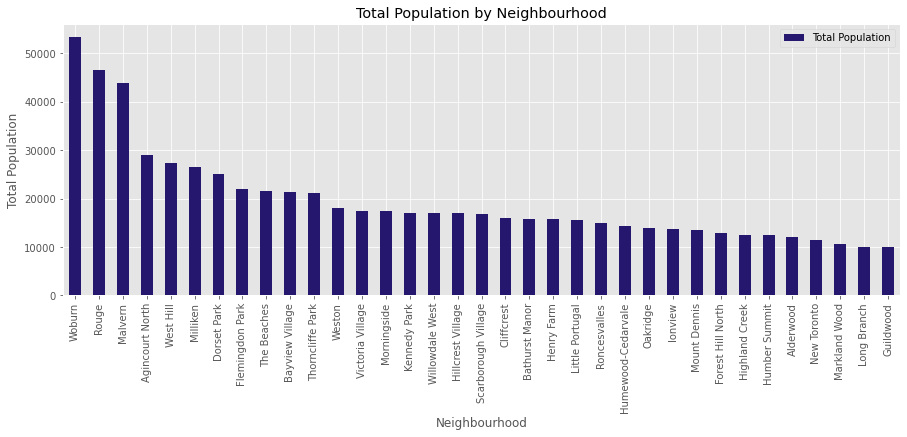

In [48]:
# define df
df_pop = final_toronto_stats_2[['Neighbourhood', 'Total Population']].set_index('Neighbourhood')

# sort by descending order
df_pop.sort_values(by='Total Population', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_pop.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('Total Population by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Population')

plt.show()

<h3>3.4: Visualising Number of busstops</h3>

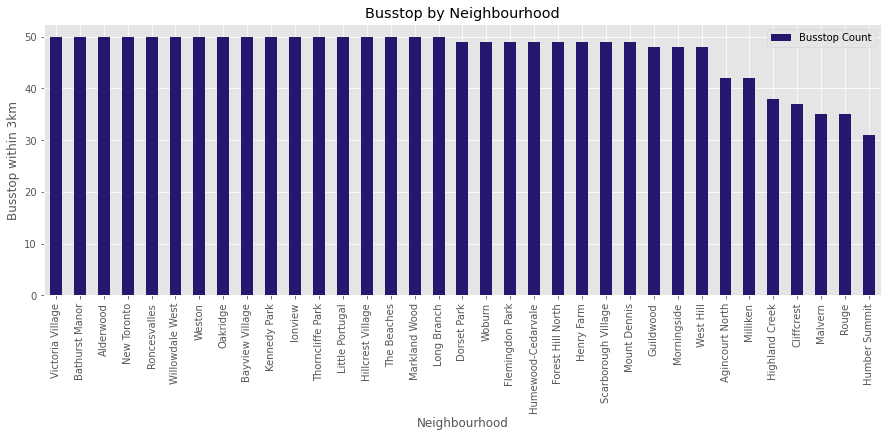

In [51]:
# define df
df_busstop = final_toronto_stats_2[['Neighbourhood', 'Busstop Count']].set_index('Neighbourhood')

# sort by descending order
df_busstop.sort_values(by='Busstop Count', ascending=False, inplace=True)

# plot
mpl.style.use('ggplot')
df_busstop.plot(kind='bar', figsize=(15,5), color='#25176e')
plt.title('Busstop by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Busstop within 3km')

plt.show()

# 4.0 K-means Clustering
<h3>4.1: Preparing Data Set - Normalising Each Category</h3>

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

final_toronto_stats_2

,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Busstop Count
0,M4A,North York,Victoria Village,43.725882,-79.315572,43743.0,17510.0,50
1,M1B,Scarborough,Rouge,43.806686,-79.194353,72784.0,46496.0,35
2,M1B,Scarborough,Malvern,43.806686,-79.194353,53425.0,43794.0,35
3,M1C,Scarborough,Highland Creek,43.784535,-79.160497,87321.0,12494.0,38
4,M3C,North York,Flemingdon Park,43.725900,-79.340923,43511.0,21933.0,49
5,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,49252.0,14365.0,49
6,M9C,Etobicoke,Markland Wood,43.643515,-79.577201,64297.0,10554.0,50
7,M1E,Scarborough,Guildwood,43.763573,-79.188711,67678.0,9917.0,48
8,M1E,Scarborough,Morningside,43.763573,-79.188711,50069.0,17455.0,48
9,M1E,Scarborough,West Hill,43.763573,-79.188711,46803.0,27392.0,48


In [54]:
k=5
final_toronto_stats_3 = final_toronto_stats_2
cluster = final_toronto_stats_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Busstop Count'], axis = 1)
cluster.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Busstop Count'}, inplace=True)
cluster.head(5)

,Latitude,Longitude
0,43.725882,-79.315572
1,43.806686,-79.194353
2,43.806686,-79.194353
3,43.784535,-79.160497
4,43.725900,-79.340923


In [55]:
kmeans = KMeans(n_clusters = k,random_state=0).fit(cluster)
kmeans.labels_

Toronto_data = final_toronto_stats_3
Toronto_data.insert(0, 'Cluster Labels', kmeans.labels_)
Toronto_data

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude,After-Tax Household Income,Total Population,Busstop Count
0,4,M4A,North York,Victoria Village,43.725882,-79.315572,43743.0,17510.0,50
1,3,M1B,Scarborough,Rouge,43.806686,-79.194353,72784.0,46496.0,35
2,3,M1B,Scarborough,Malvern,43.806686,-79.194353,53425.0,43794.0,35
3,3,M1C,Scarborough,Highland Creek,43.784535,-79.160497,87321.0,12494.0,38
4,4,M3C,North York,Flemingdon Park,43.725900,-79.340923,43511.0,21933.0,49
5,2,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,49252.0,14365.0,49
6,1,M9C,Etobicoke,Markland Wood,43.643515,-79.577201,64297.0,10554.0,50
7,3,M1E,Scarborough,Guildwood,43.763573,-79.188711,67678.0,9917.0,48
8,3,M1E,Scarborough,Morningside,43.763573,-79.188711,50069.0,17455.0,48
9,3,M1E,Scarborough,West Hill,43.763573,-79.188711,46803.0,27392.0,48


In [56]:

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood'], Toronto_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h3>4.2: Finding the Best Value for K</h3>

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytest-runner-5.3.1        |     pyhd3eb1b0_0          11 KB
    yellowbrick-1.3            |           py37_0         284 KB  districtdatalabs
    ------------------------------------------------------------
                                           Total:         294 KB

The following NEW packages will be INSTALLED:

  pytest-runner      pkgs/main/noarch::pytest-runner-5.3.1-pyhd3eb1b0_0
  yellowbrick        districtdatalabs/linux-64::yellowbrick-1.3-py37_0



pytest-runner-5.3.1  | 11 KB     | ##################################### | 100% 
yellowbrick-1.3      | 284 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transac

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


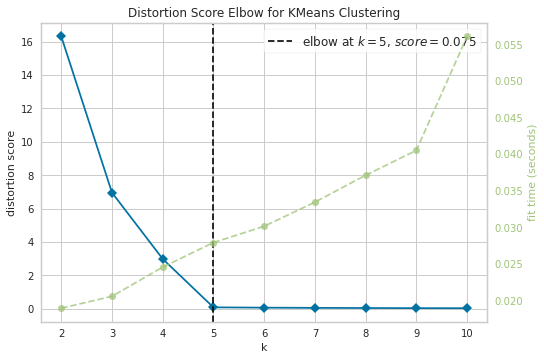

In [57]:
final_toronto_stats_4 = final_toronto_stats_2
cluster_2 = final_toronto_stats_3.drop(['Postcode', 'Borough', 'Neighbourhood','After-Tax Household Income','Total Population','Busstop Count'], axis = 1)
cluster_2.rename(columns={0:'Household Income', 1:'Population Size', 2:'Latitude', 3: 'Longtitude', 4:'Busstop Count'}, inplace=True)

from sklearn.cluster import KMeans
!conda install -c districtdatalabs yellowbrick

from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualiser
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(cluster_2)        # Fit the data to the visualiser
visualizer.show()        # Finalise and render the figure

# 5.0 Analysing Each Cluster

<h3>5.1: Cluster 0</h3>

In [58]:
Tonronto_data_C0 = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C0[Tonronto_data_C0["Cluster Labels"].isin([0])]
Tonronto_data_C0_mean = Tonronto_data_C0.mean()
Tonronto_data_C0_mean

Cluster Labels                    0.000000
Latitude                         43.799946
Longitude                       -79.333027
After-Tax Household Income    54945.200000
Total Population              21947.600000
Busstop Count                    46.600000
dtype: float64

In [59]:
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Busstop Count'])

Tonronto_data_C = Toronto_data.drop(['Postcode', 'Borough'], axis = 1)
Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([1])]
Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

stats_neighbourhood = stats_neighbourhood.append(Toronto_data_C0_mean, ignore_index = True)
stats_neighbourhood

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Busstop Count
0,1.0,51477.666667,12427.166667,43.652861,-79.541607,46.833333


<h3>5.2: All Clusters</h3>

In [60]:
i = 0
stats_neighbourhood = pd.DataFrame (columns = ['Cluster Labels','After-Tax Household Income','Total Population', 'Latitude', 'Longitude', 'Busstop Count'])

for x in range (0, 5):

    Tonronto_data_C = Toronto_data.drop(['Postcode','Borough'], axis = 1)
    Tonronto_data_C0 = Tonronto_data_C[Tonronto_data_C["Cluster Labels"].isin([i])]
    Toronto_data_C0_mean = Tonronto_data_C0.mean().to_frame().transpose()

    stats_neighbourhood = stats_neighbourhood.append(Toronto_data_C0_mean, ignore_index = True)
    i = i + 1

stats_neighbourhood

,Cluster Labels,After-Tax Household Income,Total Population,Latitude,Longitude,Busstop Count
0,0.0,54945.200000,21947.600000,43.799946,-79.333027,46.600000
1,1.0,51477.666667,12427.166667,43.652861,-79.541607,46.833333
2,2.0,50246.285714,14872.285714,43.702257,-79.439444,49.571429
3,3.0,58271.125000,28469.625000,43.775544,-79.196466,43.750000
4,4.0,46855.111111,18629.444444,43.719356,-79.291146,48.333333


In [61]:
from sklearn import preprocessing

# drop non-variable columns 
stats_neighbourhood_norm = stats_neighbourhood.drop(['Cluster Labels','Latitude','Longitude', ], axis = 1)

x = stats_neighbourhood_norm.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalised = pd.DataFrame(x_scaled)
df_normalised

,0,1,2
0,0.708661,0.593452,0.489571
1,0.404919,0.000000,0.529652
2,0.297054,0.152415,1.000000
3,1.000000,1.000000,0.000000
4,0.000000,0.386616,0.787321


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


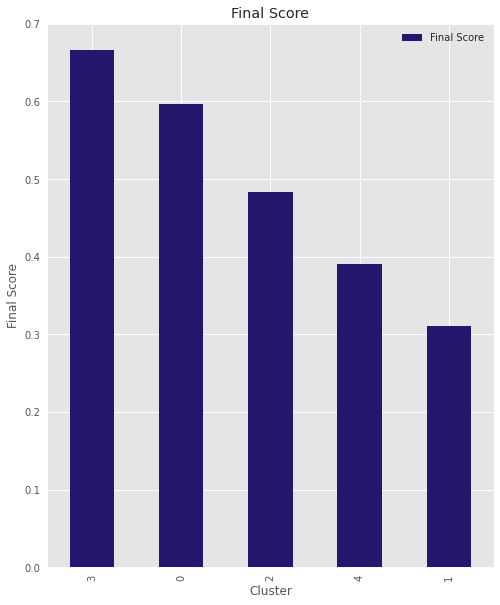

In [62]:
df_normalised_final = df_normalised.mean(axis=1).to_frame()
df_normalised_final .rename(columns={0:'Final Score'}, inplace=True)
df_normalised_final.sort_values(by='Final Score', ascending=False, inplace=True)

# plot graph
mpl.style.use('ggplot')
df_normalised_final.plot(kind='bar', figsize=(8,10), color='#25176e')
plt.title('Final Score')
plt.xlabel('Cluster')
plt.ylabel('Final Score')

plt.show()

In [63]:
df_normalised_final

,Final Score
3,0.666667
0,0.597228
2,0.483157
4,0.391312
1,0.311524
